In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Вспоминаем numpy

В большинстве приложений для анализа данных основной интерес представляет следующая функциональность:
+ быстрые векторные операции для переформатирования и очистки данных, выборки подмножеств и фильтрации, преобразований и других видов вычислений;
+ стандартные алгоритмы работы с  массивами, например фильтрация, удаление дубликатов и теоретико-множественные операции;
+ эффективная описательная статистика, агрегирование и  обобщение данных;
+ выравнивание данных и реляционные операции объединения и соединения разнородных наборов данных;
+ описание условной логики в виде выражений-массивов вместо циклов с ветвлением if-elif-else;
+ групповые операции с данными (агрегирование, преобразование, применение функции).

**Сравнение быстродействия**

In [94]:
array_ = np.arange(1000000)
list_ = list(array_)

In [95]:
%%time 
array_2 = array_ * 2

Wall time: 3 ms


In [96]:
%%time 
list_2 = []
for i in list_:
    list_2.append(i * 2)

Wall time: 406 ms


In [97]:
%%time 
list_2 = [i * 2 for i in list_]

Wall time: 258 ms


**Многомерные массивы**

In [98]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

In [99]:
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [100]:
type(data)

numpy.ndarray

In [101]:
data * 2

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [102]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

ndarray – это обобщенный многомерный контейнер для однородных данных, т. е. в нем могут храниться только элементы одного типа. У любого массива есть атрибут shape – кортеж, описывающий размер по каждому измерению,
и атрибут dtype – объект, описывающий тип данных в массиве:

In [103]:
data.shape

(2, 3)

In [104]:
data.dtype

dtype('float64')

In [105]:
np.array(["str", 1])

array(['str', '1'], dtype='<U11')

In [106]:
np.array(["str", 1]) * 2

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('int32')) -> None

**Создание массивов**

In [107]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [108]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Задание 1**
+ Создать единичную матрицу 4x4;
+ Создать матрицу 4x4, заполненную 5.

In [110]:
np.eye(4) 

#или np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [111]:
np.full((4, 4), 5)

array([[5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5]])

**Возведение элементов матрицы в квадрат и возведение матрицы в квадрат**

In [112]:
m = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3]])

In [113]:
m ** 2

array([[ 1,  4,  9],
       [16, 25, 36],
       [ 1,  4,  9]], dtype=int32)

In [114]:
np.dot(m, m)

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

In [115]:
m @ m

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

## Индексирование

In [116]:
m[0]

array([1, 2, 3])

In [117]:
m[0, 0]

1

In [118]:
m[0][1:]

array([2, 3])

**Булево индексирование**

In [119]:
m%2 == 1

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [120]:
m[m%2 == 1]

array([1, 3, 5, 1, 3])

In [121]:
m[~m%2 == 1]

array([2, 4, 6, 2])

In [122]:
m[~m%2 == 1] = 100
m

array([[  1, 100,   3],
       [100,   5, 100],
       [  1, 100,   3]])

In [123]:
m.T

array([[  1, 100,   1],
       [100,   5, 100],
       [  3, 100,   3]])

In [124]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [125]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [126]:
arr.swapaxes(0, 1)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [127]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

**Задание 2**\
Отобрать те строки data, где на соответствующих позициях в names имя Леша или Петя.

In [128]:
names = np.array(["Настя", "Петя", "Вася", "Юра", "Паша", "Леша", "Леша"])
data = np.array([[4, 8], [1, 5], [-3, 9], [99, 0], [13, 22], [12, 49], [31, 4]])

In [129]:
#создание маски
a = (names == 'Леша') | (names == 'Петя')

#применение маски
data[a]

array([[ 1,  5],
       [12, 49],
       [31,  4]])

In [130]:
data

array([[ 4,  8],
       [ 1,  5],
       [-3,  9],
       [99,  0],
       [13, 22],
       [12, 49],
       [31,  4]])

## Быстрые поэлементные операции над массивами

In [131]:
arr = np.arange(10)

In [132]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [133]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [134]:
np.maximum(np.sqrt(arr), np.exp(arr)/3)

array([3.33333333e-01, 1.00000000e+00, 2.46301870e+00, 6.69517897e+00,
       1.81993833e+01, 4.94710530e+01, 1.34476264e+02, 3.65544386e+02,
       9.93652662e+02, 2.70102798e+03])

In [135]:
np.floor(np.sqrt(arr))

array([0., 1., 1., 1., 2., 2., 2., 2., 2., 3.])

In [136]:
np.ceil(np.sqrt(arr))

array([0., 1., 2., 2., 2., 3., 3., 3., 3., 3.])

In [137]:
np.round(np.sqrt(arr))

array([0., 1., 1., 2., 2., 2., 2., 3., 3., 3.])

## Программирование на основе массивов

In [138]:
points = np.arange(-5, 5, 0.01) # 100 равноотстоящих точек
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [139]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [140]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [141]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [142]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [143]:
result = np.where(cond, xarr, yarr)

In [144]:
np.where(xarr > 1.3, 2, xarr)

array([1.1, 1.2, 1.3, 2. , 2. ])

**Задача 3**\
Сгенерировать массив из случайных положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.

In [145]:
array = np.random.rand(10) * 50 #array в диапазоне от 0 до 50

mean = np.mean(array)

# Выводим элементы массива, которые больше среднего арифметического
above_average = array[array > mean]
    
above_average

array([23.85359062, 40.25964519, 44.9799927 , 25.3561443 , 44.01123962])

**Задача 4**\
Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
+ Определить количество элементов, отличающихся от минимального на 5.
+ Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.

In [146]:
array = np.random.randint(0, 11, 20)

# Определение количества элементов, отличающихся от минимального на 5
minimum = np.min(array)
amount_dif_5 = np.sum(np.abs(array - minimum) == 5)
print("Количество элементов, отличающихся от минимального на 5:", amount_dif_5)

# четные числа на нечетных местах
even_nums = array[1::2][array[1::2] % 2 == 0]

if len(even_nums) > 0:
    mean_even_nums = np.mean(even_nums)
else:
    mean_even_nums = np.nan

print("Среднее арифметическое всех четных элементов массива, стоящих на нечетных местах:", mean_even_nums)

Количество элементов, отличающихся от минимального на 5: 2
Среднее арифметическое всех четных элементов массива, стоящих на нечетных местах: 5.333333333333333


In [147]:
# сам массив ради интереса
array

array([ 3,  1,  0,  1, 10,  8,  7, 10,  8,  9,  6,  9,  5,  2,  5,  2,  3,
        2,  1,  8])

**Задача 5**\
Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
+ Возвести в квадрат максимальный элемент матрицы.
+ Все четные числа заменить на 0.

In [148]:
A = np.random.randint(1, 11, (5, 5))
A

array([[ 8,  8,  4,  2,  7],
       [ 2,  1,  6,  8,  5],
       [10,  5,  6,  2,  1],
       [ 5,  5,  6,  7, 10],
       [ 8,  6,  4,  6,  2]])

In [149]:
max_element = np.max(A)
max_element_square = max_element ** 2

max_element_square

100

In [150]:
# Замена всех четных чисел на 0
A[A % 2 == 0] = 0
A

array([[0, 0, 0, 0, 7],
       [0, 1, 0, 0, 5],
       [0, 5, 0, 0, 1],
       [5, 5, 0, 7, 0],
       [0, 0, 0, 0, 0]])

**Задача 6**\
Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.

In [151]:
# матрица B размером 5 на 5, элементы которой лежат в интервале [-5, 5]
B = np.random.randint(-5, 6, (5, 5))
B

array([[ 0, -5, -1,  4, -5],
       [-4,  2, -5, -1, -5],
       [-5, -2,  0,  3,  3],
       [ 3, -4, -2,  5,  0],
       [-3,  3, -3,  5,  4]])

In [152]:
for i in range(B.shape[0]):
    row = B[i]
    negative_count = np.sum(row < 0)
    row[row < 0] = negative_count

B

array([[0, 3, 3, 4, 3],
       [4, 2, 4, 4, 4],
       [2, 2, 0, 3, 3],
       [3, 2, 2, 5, 0],
       [2, 3, 2, 5, 4]])

# Вспоминаем pandas не сильно

Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.
Например, "В университеты поступить сложнее (процент принятых меньше)"

Формат файла
+ School -  название школы
+ School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')
+ SAT - медиана объединенных значений Math и Verbal SAT  студентов
+ Acceptance: - % принятых абитуриентов
+ $/Student  -  Деньги, расходуемые на одного студента в среднем
+ Top 10% -  % студентов в топ 10% выпускных классов
+ %PhD -  %  факультетов, имеющих PhD
+ Grad%: % студентов, которые успешно завершили обучение

In [153]:
#df = pd.read_csv('data/colleges.txt', delimiter='\t')
df = pd.read_csv('colleges.txt', delimiter='\t')

In [154]:
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


В сведения о датафрейме входит общая информация о нём вроде заголовка, количества значений, типов данных столбцов.

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   School       50 non-null     object
 1   School_Type  50 non-null     object
 2   SAT          50 non-null     int64 
 3   Acceptance   50 non-null     int64 
 4   $/Student    50 non-null     int64 
 5   Top 10%      50 non-null     int64 
 6   %PhD         50 non-null     int64 
 7   Grad%        50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.2+ KB


In [156]:
#предобработка заголовков
df.columns = [
    'school_name', 
    'school_type', 
    'sat', 
    'acceptance_per', 
    'money_for_student', 
    'top_10_percent', 
    'phd_percent', 
    'grad_per']

In [157]:
df.tail()

,school_name,school_type,sat,acceptance_per,money_for_student,top_10_percent,phd_percent,grad_per
45,U Michican,Univ,1195,60,21853,71,93,77
46,Carnegie Mellon,Univ,1225,64,33607,52,84,77
47,Northwestern,Univ,1230,47,28851,77,79,82
48,Washington U (MO),Univ,1225,54,39883,71,98,76
49,U of Rochester,Univ,1155,56,38597,52,96,73


Вывод статистических сведений о датафрейме:

In [158]:
df.describe()

,sat,acceptance_per,money_for_student,top_10_percent,phd_percent,grad_per
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000


**Задание 1**\
Проверить являются ли выборки связными.

In [159]:
#разделение данных на две выборки по school_type
lib_arts_df = df[df['school_type'] == 'Lib Arts'].reset_index(drop=True)
univ_df = df[df['school_type'] == 'Univ'].reset_index(drop=True)
univ_df

,school_name,school_type,sat,acceptance_per,money_for_student,top_10_percent,phd_percent,grad_per
0,Harvard,Univ,1370,18,46918,90,99,90
1,Stanford,Univ,1370,18,61921,92,96,88
2,Yale,Univ,1350,19,52468,90,97,93
3,Princeton,Univ,1340,17,48123,89,99,93
4,Cal Tech,Univ,1400,31,102262,98,98,75
5,MIT,Univ,1357,30,56766,95,98,86
6,Duke,Univ,1310,25,39504,91,95,91
7,Dartmouth,Univ,1306,25,35804,86,100,95
8,Cornell,Univ,1280,30,37137,85,90,83
9,Columbia,Univ,1268,29,45879,78,93,90


In [160]:
univ_df['school_name'].unique()

array(['Harvard', 'Stanford', 'Yale', 'Princeton', 'Cal Tech', 'MIT',
       'Duke', 'Dartmouth', 'Cornell', 'Columbia', 'U of Chicago',
       'Brown', 'U Penn', 'Berkeley', 'Johns Hopkins', 'Rice', 'UCLA',
       'U Va.', 'Georgetown', 'UNC', 'U Michican', 'Carnegie Mellon',
       'Northwestern', 'Washington U (MO)', 'U of Rochester'],
      dtype=object)

In [161]:
lib_arts_df['school_name'].unique()

array(['Amherst', 'Swarthmore', 'Williams', 'Bowdoin', 'Wellesley',
       'Pomona', 'Wesleyan (CT)', 'Middlebury', 'Smith', 'Davidson',
       'Vassar', 'Carleton', 'Claremont McKenna', 'Oberlin',
       'Washington & Lee', 'Grinnell', 'Mount Holyoke', 'Colby',
       'Hamilton', 'Bates', 'Haverford', 'Colgate', 'Bryn Mawr',
       'Occidental', 'Barnard'], dtype=object)

In [162]:
lib_arts_df['school_name'].unique() == univ_df['school_name'].unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

**Вывод:** данные выборки не связаны между собой.

**Задание 2**\
Постройте ящики с усами по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

In [163]:
df.head()

,school_name,school_type,sat,acceptance_per,money_for_student,top_10_percent,phd_percent,grad_per
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


BOXPLOT № 1 по столбцу "sat"


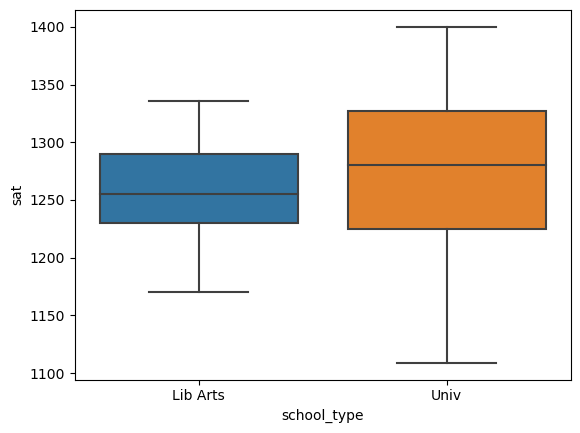

BOXPLOT № 2 по столбцу "acceptance_per"


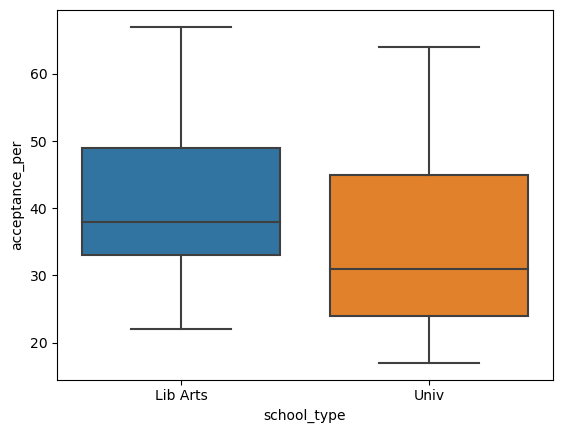

BOXPLOT № 3 по столбцу "money_for_student"


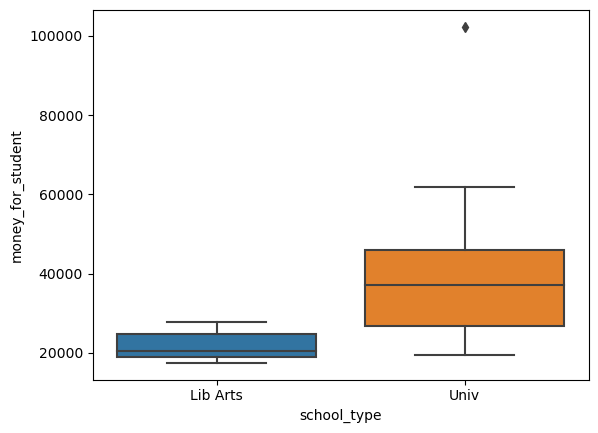

BOXPLOT № 4 по столбцу "top_10_percent"


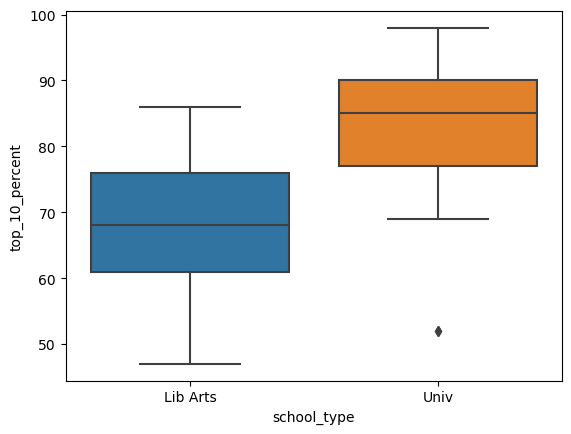

BOXPLOT № 5 по столбцу "phd_percent"


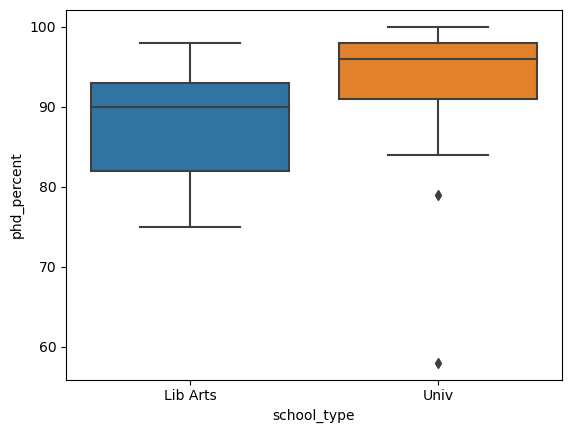

BOXPLOT № 6 по столбцу "grad_per"


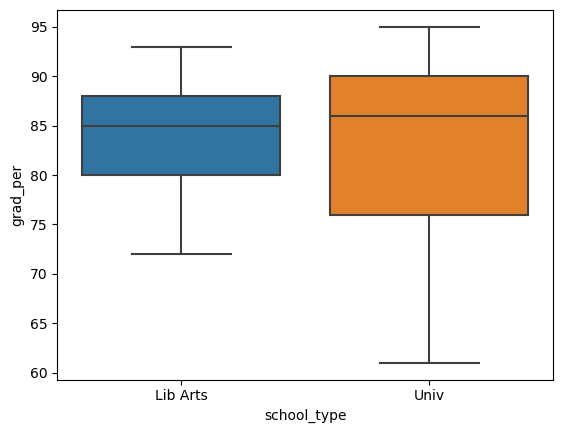

In [164]:
# ящики с усами по каждой из характеристик
col_list = ['sat', 'acceptance_per', 'money_for_student', 'top_10_percent', 'phd_percent', 'grad_per']

n = 1
for col in col_list:
    
    print(f'BOXPLOT № {n} по столбцу "{col}"')
    
    
    sns.boxplot(data=df, x='school_type', y=col)
    plt.show()
    n += 1

In [165]:
%%HTML
<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно ниже, чем в университетах</label><br>

<input type="checkbox" id="1">
<label for="1">Разброс средств, расходуемых в среднем на одного студента, в школах искусств больше, чем в университетах</label><br>

<input type="checkbox" id="2">
<label for="2">% процент принятых студентов в школах искусств и в университетах примерно равны</label><br>

<input type="checkbox" id="3">
<label for="3">Разброс баллов SAT в университетах ниже, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах выше, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс средств, расходуемых в среднем на одного студента, в школах искусств меньше, чем в университетах</label><br>

<input type="checkbox" id="0">
<label for="0">В одном из университетов тратят сильно больше денег в среднем на одного студента, чем в других университетах</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах и школах искусств практически не различается</label><br>

<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно выше, чем в университетах</label><br>

In [167]:
#галочки в чек-боксах не сохраняются, поэтому ответ в виде текста (только верные утверждения)

**Ответ:**
+ % процент принятых студентов в школах искусств и в университетах примерно равны
+ Разброс баллов SAT в университетах выше, чем в школах искусств
+ Разброс средств, расходуемых в среднем на одного студента, в школах искусств меньше, чем в университетах
+ В одном из университетов тратят сильно больше денег в среднем на одного студента, чем в других университетах

**Задание 3**\
Постройте гистограммы по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

Hint: для каждой пары связанных утверждений, надо выбрать одно из них.

In [ ]:
df_merged['sm_price'].hist(figsize=(10, 8), legend=True)
plt.title('Распределение стоимости м^2')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame с названием df, содержащий данные

# Пример создания DataFrame для демонстрации
data = {
    'sat': [1200, 1100, 1300, 1250, 1150, 1350, 1400, 1250, 1100, 1300],
    'school_type': ['public', 'private', 'public', 'private', 'public', 'private', 'public', 'private', 'public', 'private']
}

df = pd.DataFrame(data)

# Группируем данные по типу школы
grouped = df.groupby('school_type')

# Создаем гистограмму для каждого типа школы
plt.figure(figsize=(8, 6))
for name, group in grouped:
    plt.hist(group['sat'], bins=10, alpha=0.5, label=name)

plt.xlabel('SAT Score')
plt.ylabel('Frequency')
plt.title('SAT Scores Distribution by School Type')
plt.legend()
plt.grid(True)
plt.show()

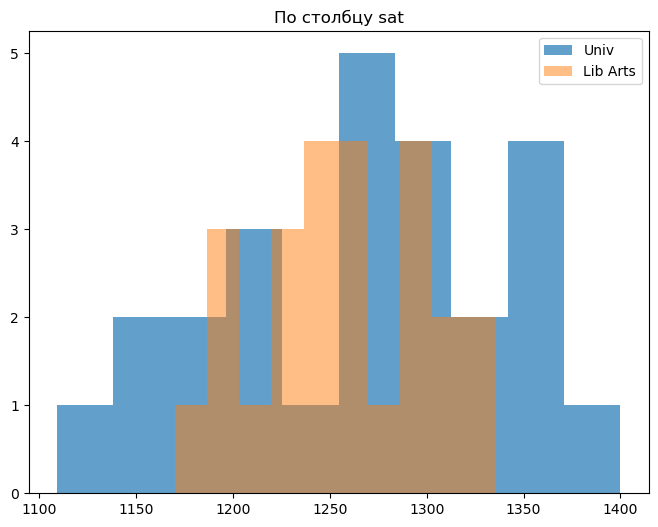

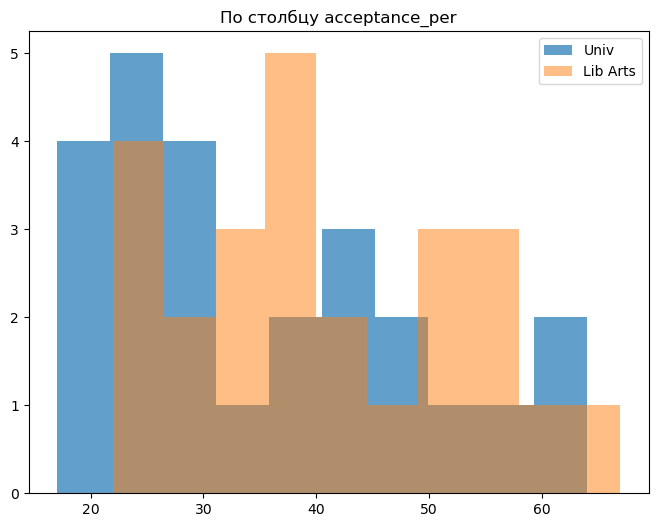

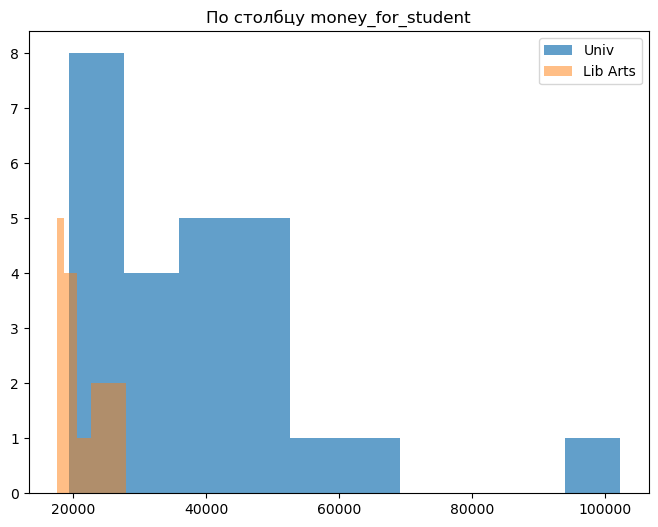

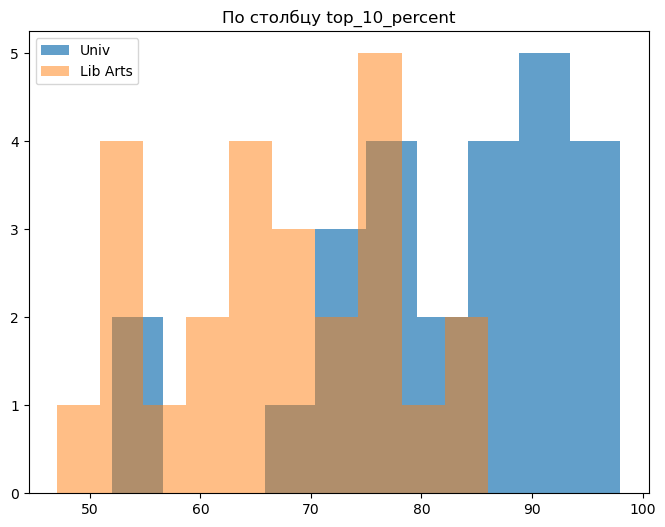

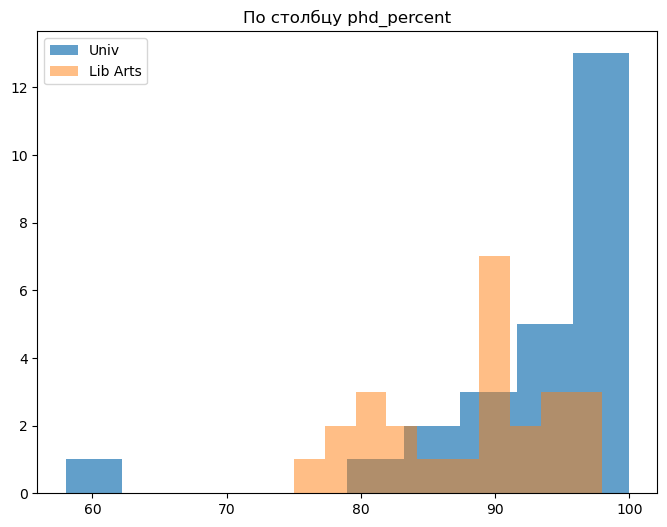

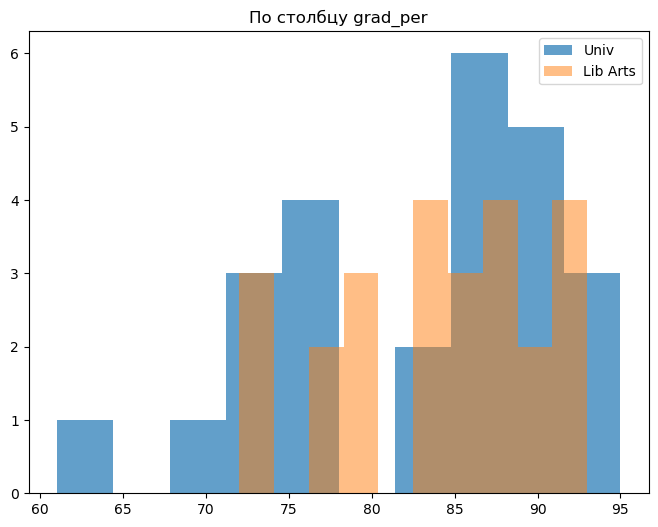

In [192]:
col_list = ['sat', 'acceptance_per', 'money_for_student', 'top_10_percent', 'phd_percent', 'grad_per']

for col in col_list:
    plt.figure(figsize=(8, 6))
    plt.hist(univ_df[col], alpha=0.7, label='Univ')
    plt.hist(lib_arts_df[col], alpha=0.5, label='Lib Arts')
    plt.title(f'По столбцу {col}')
    plt.legend()
    plt.show()
    print()

In [195]:
%%HTML
<input type="checkbox" id="0">
<label for="0"></label>Распределение процента факультетов с Phd в школах искусств напоминает "нормальное"<br>

<input type="checkbox" id="1">
<label for="1">Распределение процента факультетов с Phd в университетах напоминает "нормальное"</label><br>

<input type="checkbox" id="2">
<label for="2"></label>Гистограмма процента студентов, которые успешно завершили университеты, имеет несколько пиков<br>

<input type="checkbox" id="3">
<label for="3">Гистограмма процента студентов, которые успешно завершили школы искусств, имеет несколько пиков</label><br>

<input type="checkbox" id="5">
<label for="5">В университетах процент факультетов с Phd выше</label><br>

<input type="checkbox" id="4">
<label for="4">В школах искусств процент факультетов с Phd выше</label><br>

**Ответ:**
+ Распределение процента факультетов с Phd в школах искусств напоминает "нормальное"
+ Гистограмма процента студентов, которые успешно завершили школы искусств, имеет несколько пиков
+ В университетах процент факультетов с Phd выше

**Задание 4**\
Найдите:
+ выборочное среднее SAT школ искусств;
+ 3й выборочный квартиль Acceptance университетов;
+ название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах).

In [196]:
#выборочное среднее SAT школ искусств
lib_arts_df['sat'].mean()

1256.64

In [199]:
#3-й выборочный квартиль Acceptance университетов
univ_df['acceptance_per'].quantile([0.75])

0.75    45.0
Name: acceptance_per, dtype: float64

In [213]:
#название института, в котором тратят денег в среднем на одного студента больше всего
name = univ_df[univ_df['money_for_student'] == max(univ_df['money_for_student'])]
print(name['school_name'])

4    Cal Tech
Name: school_name, dtype: object
